# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [2]:
# run this cell to upload file using GUI if you are using google colab

#from google.colab import files
#files.upload()

In [3]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# importing the dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/prices.csv')

In [5]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
# checking the dimesions of the dataset
df.shape

(851264, 7)

In [7]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


## Question 2

### Drop null
- Drop null values if any

In [8]:
# checking if the dataset has any null values
df.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [9]:
# there are no null values

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [10]:
# dropping the columns "date", "volume" and "symbol" 
df = df.drop(["date", "volume", "symbol" ],axis=1)

In [11]:
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


## Question 3

### Print the dataframe
- print the modified dataframe

In [12]:
print(df)

              open       close         low        high
0       123.430000  125.839996  122.309998  126.250000
1       125.239998  119.980003  119.940002  125.540001
2       116.379997  114.949997  114.930000  119.739998
3       115.480003  116.620003  113.500000  117.440002
4       117.010002  114.970001  114.089996  117.330002
...            ...         ...         ...         ...
851259  103.309998  103.199997  102.849998  103.930000
851260   43.070000   43.040001   42.689999   43.310001
851261   53.639999   53.529999   53.270000   53.740002
851262   44.730000   45.450001   44.410000   45.590000
851263   54.200001   53.630001   53.389999   54.480000

[851264 rows x 4 columns]


In [13]:
df.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [14]:
# separating the dataset into features and labels 

# features 
X = df[["open", "low", "high"]]

# labels
y = df["close"]

In [15]:
X.head()

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002


In [16]:
y.head()

0    125.839996
1    119.980003
2    114.949997
3    116.620003
4    114.970001
Name: close, dtype: float64

## Question 4

### Create train and test sets
- Split the data into training and testing

In [17]:
from sklearn import model_selection, preprocessing

In [18]:
#split the data to training and testing model
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=7)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [19]:
# scaling the data
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [20]:
# X_train is already numpy, checking the type
type(X_train)

numpy.ndarray

In [21]:
# X_test is already numpy, checking the type
type(X_test)

numpy.ndarray

In [22]:
# converting into numpy
import numpy as np
y_train = np.array(y_train)
y_test = np.array(y_test)

In [23]:
type(y_train)

numpy.ndarray

In [24]:
type(y_test)

numpy.ndarray

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D

# building the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = (3,), activation ='linear'))
model.output_shape

(None, 1)

In [26]:
# building the model with flatten
model_flt = Sequential([Input(shape=(3,1)),
                                   Flatten(),
                                   Dense(1, activation='linear')])
model.output_shape

(None, 1)

In [27]:
# checking the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [28]:
# checking the summary of the model
model_flt.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [29]:
from tensorflow.keras.optimizers import Adam

# compiling the model
model.compile(loss='mean_squared_error', optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [30]:
# compiling the model
model_flt.compile(loss='mean_squared_error', optimizer='sgd')
model_flt.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [31]:
# fitting the model 
model_flt.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=128)

Epoch 1/50
4988/4988 [==============================] - 5s 959us/step - loss: 39.1482 - val_loss: 0.9486
Epoch 2/50
4988/4988 [==============================] - 5s 928us/step - loss: 0.9788 - val_loss: 0.9342
Epoch 3/50
4988/4988 [==============================] - 5s 929us/step - loss: 0.9704 - val_loss: 0.9288
Epoch 4/50
4988/4988 [==============================] - 5s 936us/step - loss: 0.9631 - val_loss: 0.9360
Epoch 5/50
4988/4988 [==============================] - 5s 939us/step - loss: 0.9546 - val_loss: 0.9169
Epoch 6/50
4988/4988 [==============================] - 5s 932us/step - loss: 0.9480 - val_loss: 0.9081
Epoch 7/50
4988/4988 [==============================] - 5s 935us/step - loss: 0.9406 - val_loss: 0.9119
Epoch 8/50
4988/4988 [==============================] - 5s 933us/step - loss: 0.9341 - val_loss: 0.8933
Epoch 9/50
4988/4988 [==============================] - 5s 925us/step - loss: 0.9268 - val_loss: 0.8889
Epoch 10/50
4988/4988 [==============================] - 5s 934

In [32]:
# fitting the model 
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=128)

Epoch 1/50
4988/4988 [==============================] - 5s 935us/step - loss: 38.8423 - val_loss: 0.9621
Epoch 2/50
4988/4988 [==============================] - 5s 915us/step - loss: 0.9741 - val_loss: 0.9415
Epoch 3/50
4988/4988 [==============================] - 5s 922us/step - loss: 0.9671 - val_loss: 0.9335
Epoch 4/50
4988/4988 [==============================] - 5s 920us/step - loss: 0.9609 - val_loss: 0.9187
Epoch 5/50
4988/4988 [==============================] - 5s 922us/step - loss: 0.9547 - val_loss: 0.9121
Epoch 6/50
4988/4988 [==============================] - 5s 911us/step - loss: 0.9467 - val_loss: 0.9085
Epoch 7/50
4988/4988 [==============================] - 5s 926us/step - loss: 0.9414 - val_loss: 0.8993
Epoch 8/50
4988/4988 [==============================] - 5s 915us/step - loss: 0.9322 - val_loss: 0.8985
Epoch 9/50
4988/4988 [==============================] - 5s 918us/step - loss: 0.9250 - val_loss: 0.8951
Epoch 10/50
4988/4988 [==============================] - 5s 912

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [33]:
# get the scores of the model
scores = model.evaluate(X_test, y_test, verbose=0)
scores

0.6812427043914795

In [34]:
# get the scores of the model
scores_flt = model_flt.evaluate(X_test, y_test, verbose=0)
scores_flt

0.6891598701477051

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [35]:
# predicting with the model
model_flt.predict(sc.transform([[123.430000, 122.30999, 116.250000]]))

array([[119.72748]], dtype=float32)

In [36]:
# predicting with the model
model.predict(sc.transform([[123.430000, 122.30999, 116.250000]]))

array([[119.68052]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [37]:
# loading the dataset
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [38]:
# shape the train dataset
trainX.shape

(60000, 28, 28)

In [39]:
# shape the test dataset
testX.shape

(10000, 28, 28)

### Change train and test labels into one-hot vectors

In [40]:
# one hot encoding the train and test
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [41]:
trainY

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Build the Graph

### Initialize model, reshape & normalize data

In [42]:
# building the model
model_mnist = tf.keras.models.Sequential()
model_mnist.add(tf.keras.layers.Reshape((784,), input_shape=(28,28)))
model_mnist.add(tf.keras.layers.BatchNormalization())

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [43]:
# adding the hidden layers
model_mnist.add(tf.keras.layers.Dense(200, activation='relu'))
model_mnist.add(tf.keras.layers.Dense(100, activation='relu'))
model_mnist.add(tf.keras.layers.Dropout(0.25))


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [44]:
# adding the output layer
model_mnist.add(tf.keras.layers.Dense(10, activation='softmax'))

In [45]:
# compiling the model
model_mnist.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# fitting the model
model_mnist.fit(trainX, trainY, validation_data=(testX,testY), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5110 - accuracy: 0.8165 - val_loss: 0.4072 - val_accuracy: 0.8495
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3948 - accuracy: 0.8541 - val_loss: 0.3774 - val_accuracy: 0.8598
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3640 - accuracy: 0.8663 - val_loss: 0.4077 - val_accuracy: 0.8623
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3349 - accuracy: 0.8759 - val_loss: 0.3832 - val_accuracy: 0.8712
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3155 - accuracy: 0.8832 - val_loss: 0.3347 - val_accuracy: 0.8773
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3004 - accuracy: 0.8882 - val_loss: 0.3903 - val_accuracy: 0.8718
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2855 - accuracy: 0.8932 - val_loss: 0.3652 - val_accuracy:

In [47]:
# getting the predictions
predictions = model_mnist.predict(testX)

In [48]:
# checking the first predicted value
predictions[0]

array([3.9827266e-10, 4.0065173e-12, 4.2741077e-09, 3.7487666e-11,
       1.7859857e-10, 3.5038209e-04, 1.0004561e-08, 9.2144376e-03,
       4.6742670e-08, 9.9043524e-01], dtype=float32)

In [49]:
# getting the index of the highest values
np.argmax(predictions[0])

9

In [50]:
# checking against the label
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

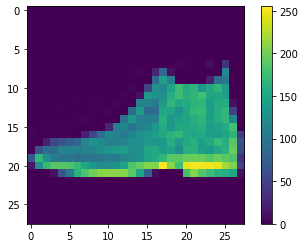

In [51]:
# checking the image 
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(testX[0])
plt.colorbar()
plt.grid(False)
plt.show()